# ANALÍTICA PREDICTIVA

## S4 – CASO PRÁCTICO – BDD FINAL

#### Diego Rodríguez Villamarín
#### Sebastián Torres Naranjo
                
#### Fecha de entrega: 22 de mayo de 2023

## ENFOQUE ECONOMÉTRICO

### 1. Importación de librerías y base de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [3]:
df = pd.read_csv("Walmart.csv")

In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
#Recodificación de nombres
df.rename({'Store':'Tienda', 'Date': 'Fecha', 'Weekly_Sales':'Ventas_semanales', 'Holiday_Flag': 'Semana_especial', 'Temperature': 'Temperatura', 'Fuel_Price': 'Precio_combustible', 'CPI': 'Indice_precios_consumidor', 'Unemployment': 'Tasa_desempleo'}, axis=1, inplace=True)

In [6]:
df

,Tienda,Fecha,Ventas_semanales,Semana_especial,Temperatura,Precio_combustible,Indice_precios_consumidor,Tasa_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### Variables incluidas

Las variables numéricas y categóricas consideradas dentro de la base de datos son:

- Tienda: Número de la tienda de Walmart
- Fecha: Semana de ventas
- Ventas_semanales: Ventas semanales para la tienda dada
- Semana_especial: Si la semana es una semana especial de vacaciones (1 si lo es, 0 si no lo es)
- Temperatura: Temperatura en el día de la venta
- Precio_combustible: Costo del combustible en la región
- Indice_precios_consumidor: ïndice de precios al consumidor (vigente)
- Tasa_desempleo: Tasa de desempleo predominante

### 2. Descripción de la base de datos e identificación de las variables numéricas y categóricas

In [7]:
df.describe()

,Tienda,Ventas_semanales,Semana_especial,Temperatura,Precio_combustible,Indice_precios_consumidor,Tasa_desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<div style="text-align: justify">A partir del comando .describe() es posible observar los estadísticos principales de las variables numéricas contenidas en la base de datos empleada. De este modo, se pueden visualizar el promedio (media), la desviación estándar, los valores mínimos y máximos, y los cuartiles de las variables Ventas_semanales, Temperatura, Precio_combustible, Indice_precios_consumidor y Tasa_desempleo.</div>
<div style="text-align: justify">En este contexto, se puede advertir que el conteo (count) de las observaciones es idéntico para cada variable. De esta manera, se puede señalar, a priori, la ausencia de valores perdidos para cada una de las variables. Aquella afirmación será comprobada o refutada en la siguiente pregunta, con la utilización del código específico para estos fines.</div>
<div style="text-align: justify">Finalmente, se puede advertir de la variable Semana_especial está siendo considerada como variable numérica y no como variable categórica. Por tanto, es necesario cambiar el tipo de esta variable.</div>

In [12]:
df['Semana_especial'] = pd.Categorical(df.Semana_especial)

In [26]:
df.describe()

,Tienda,Fecha,Ventas_semanales,Temperatura,Precio_combustible,Indice_precios_consumidor,Tasa_desempleo
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,71.000000,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,12.988182,41.282743,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,35.000000,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,23.000000,71.000000,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,34.000000,107.000000,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,45.000000,142.000000,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [24]:
pd.crosstab(index=df["Semana_especial"], columns="count")

col_0,count
Semana_especial,
0,5985
1,450


<div style="text-align: justify">Así, se puede observar que en el conjunto de datos existen $450$ semanas que corresponden a distintas ocasiones por las que se generaron vacaciones.</div>

### 3. Evaluación de datos perdidos

In [25]:
df.isna().sum()

Tienda                       0
Fecha                        0
Ventas_semanales             0
Semana_especial              0
Temperatura                  0
Precio_combustible           0
Indice_precios_consumidor    0
Tasa_desempleo               0
dtype: int64

<div style="text-align: justify">Como se puede observar, no existe presencia de valores perdidos en el conjunto de datos empleado.</div>

### 4. Evaluación de datos atípicos

(0.0, 1.0, 0.0, 1.0)

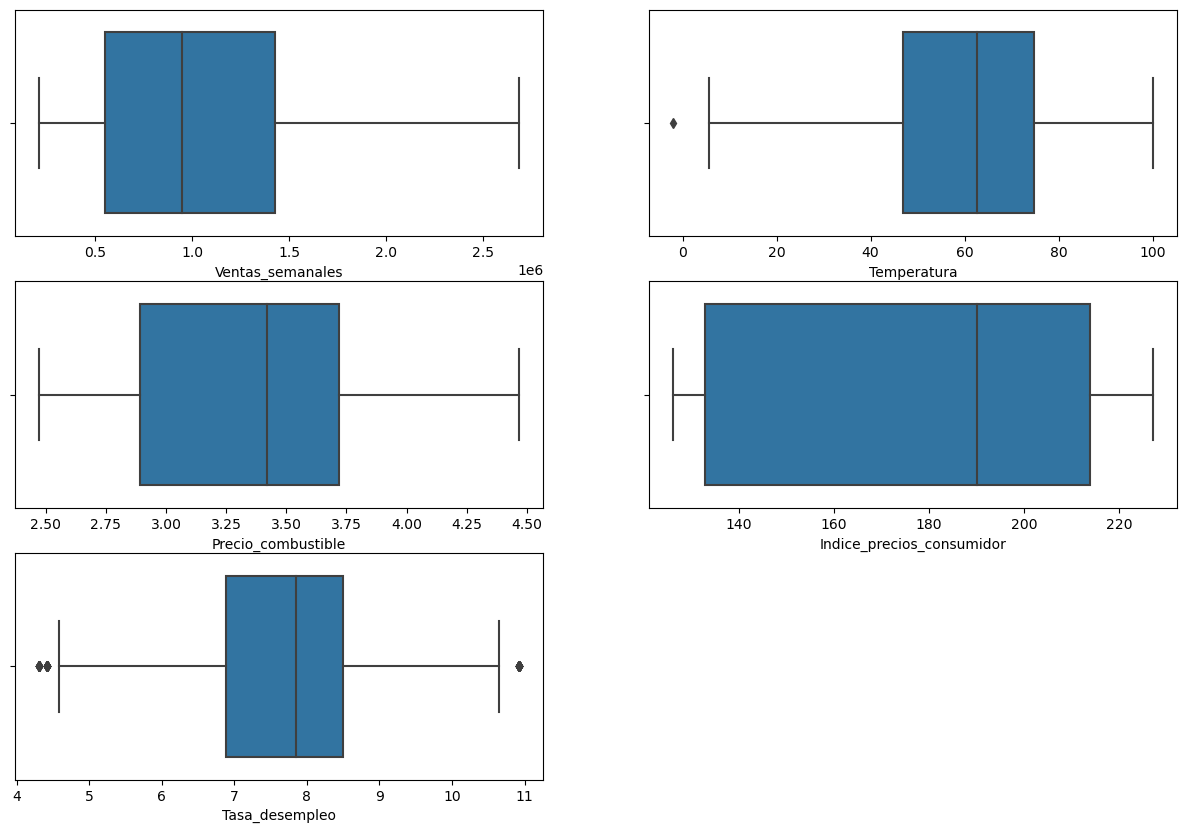

In [42]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (15,10))
plt1 = sns.boxplot(df['Ventas_semanales'], ax = axs[0,0])
plt2 = sns.boxplot(df['Temperatura'], ax = axs[0,1])
plt1 = sns.boxplot(df['Precio_combustible'], ax = axs[1,0])
plt2 = sns.boxplot(df['Indice_precios_consumidor'], ax = axs[1,1])
plt1 = sns.boxplot(df['Tasa_desempleo'], ax = axs[2,0])
axs[-1, -1].axis('off')

<div style="text-align: justify">A partir del conjunto de gráficos precedente, se puede observar que las Precio_combustible e Indice_precios_consumidor no presentan valores atípicos. Por otro lado, la variables Temperatua presenta ciertos valores extremos, sin embargo, su distancia de la media no es tan significativa.</div>
<div style="text-align: justify">La variables Ventas_semanales y Tasa_desempleo requieren un tratamiento, puesto que se puede observar un significativo número de datos atípicos. Para corregir el problema, se considerarán únicamente las observaciones que se encuentran dentro del rango intercuartil.</div>

#### 4.1. Tratamiento variable Ventas_semanales

<div style="text-align: justify">Antes de corregir el problema, se visualizará la distribución de la variable Ventas_semanales.</div>

<AxesSubplot:xlabel='Ventas_semanales', ylabel='Density'>

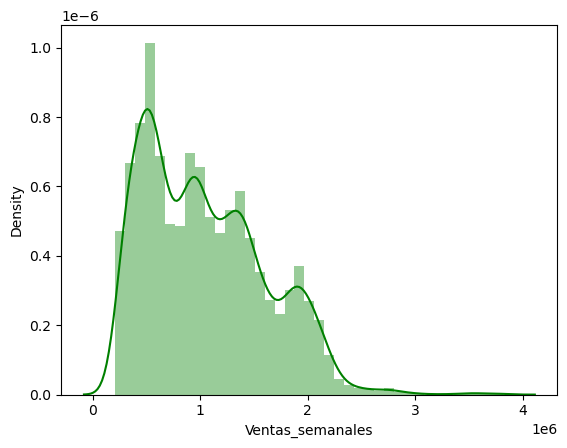

In [31]:
sns.distplot(df['Ventas_semanales'],color="green")

<div style="text-align: justify">Ahora, se conservarán únicamente las observaciones que estén dentro del rango intercuartil:</div>

In [33]:
Q1_ventas = df.Ventas_semanales.quantile(0.25)
Q3_ventas = df.Ventas_semanales.quantile(0.75)
IQR_ventas = Q3_ventas - Q1_ventas  #rango intercuartil
print(IQR_ventas)

866808.5549999999


In [34]:
df = df[~((df['Ventas_semanales'] < (Q1_ventas - 1.5 * IQR_ventas)) |(df['Ventas_semanales'] > (Q3_ventas + 1.5 * IQR_ventas)))]
df.shape

(6401, 8)

<AxesSubplot:xlabel='Ventas_semanales', ylabel='Density'>

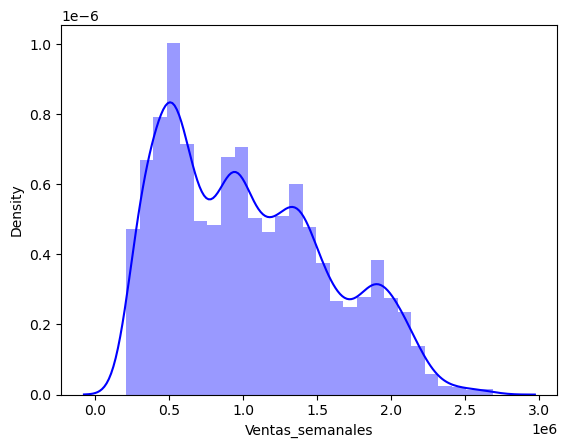

In [35]:
sns.distplot(df['Ventas_semanales'],color="blue")

#### 4.1. Tratamiento variable Tasa_desempleo

<div style="text-align: justify">Antes de corregir el problema, se visualizará la distribución de la variable Tasa_desempleo.</div>

<AxesSubplot:xlabel='Tasa_desempleo', ylabel='Density'>

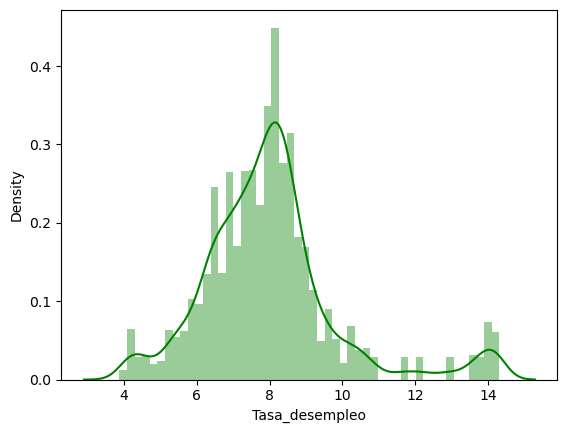

In [36]:
sns.distplot(df['Tasa_desempleo'],color="green")

<div style="text-align: justify">Ahora, se conservarán únicamente las observaciones que estén dentro del rango intercuartil:</div>

In [37]:
Q1_desemp = df.Tasa_desempleo.quantile(0.25)
Q3_desemp = df.Tasa_desempleo.quantile(0.75)
IQR_desemp = Q3_desemp - Q1_desemp  #rango intercuartil
print(IQR_desemp)

1.7309999999999999


In [38]:
df = df[~((df['Tasa_desempleo'] < (Q1_desemp - 1.5 * IQR_desemp)) |(df['Tasa_desempleo'] > (Q3_desemp + 1.5 * IQR_desemp)))]
df.shape

(5920, 8)

<AxesSubplot:xlabel='Tasa_desempleo', ylabel='Density'>

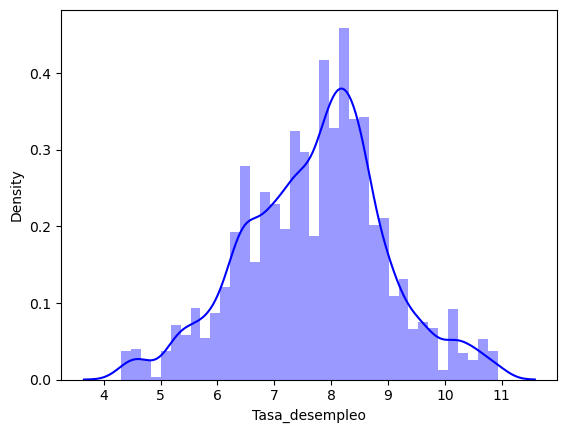

In [39]:
sns.distplot(df['Tasa_desempleo'],color="blue")

<div style="text-align: justify">De este modo, en las variables Ventas_semanales y Tasa_desempleo se han conservado únicamente las observaciones que estén dentro del rango intercuartil. Como se había señalado, el resto de variables no presentan problemas con respecto a datos atípicos, por tanto, no se efectuará algún tratamiento adicional.</div>

### 5. Distribuciones de variables

(0.0, 1.0, 0.0, 1.0)

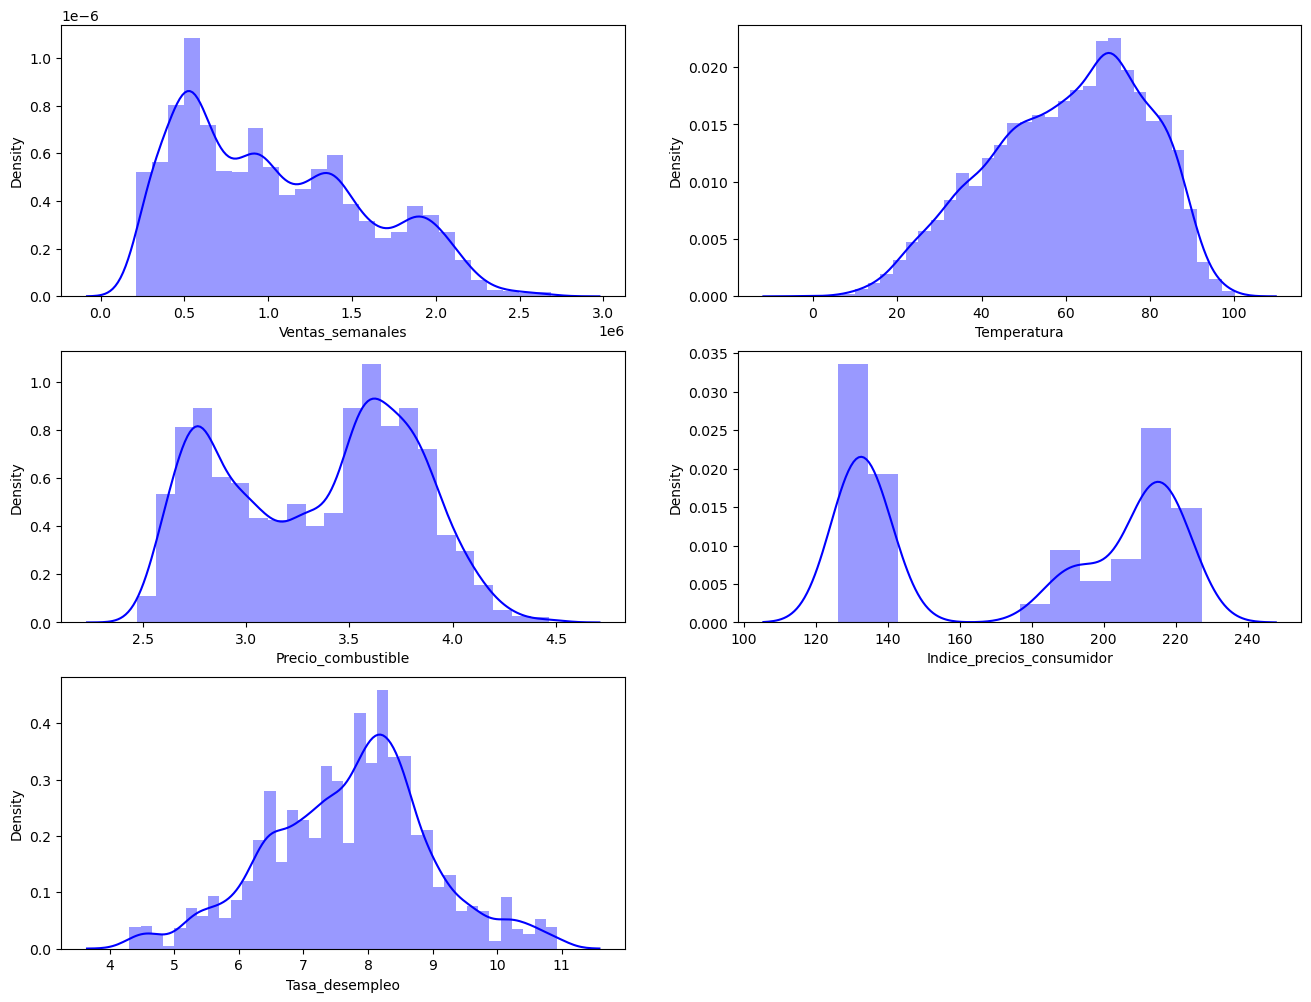

In [41]:
fig, axs = plt.subplots(3,2, figsize = (16,12))
plt1 = sns.distplot(df['Ventas_semanales'], color="blue", ax = axs[0,0])
plt2 = sns.distplot(df['Temperatura'], color="blue", ax = axs[0,1])
plt1 = sns.distplot(df['Precio_combustible'], color="blue", ax = axs[1,0])
plt2 = sns.distplot(df['Indice_precios_consumidor'], color="blue", ax = axs[1,1])
plt1 = sns.distplot(df['Tasa_desempleo'], color="blue", ax = axs[2,0])
axs[-1, -1].axis('off')

<div style="text-align: justify">A partir de los gráficos precedentes se puede visualizar la distribución de cada una de las variables de naturaleza numérica.</div>
<p><div style="text-align: justify">Ventas_semanales: La función de densidad de la variable $Ventas\_semanles$ es multimodal.</div>
<p><div style="text-align: justify">Temperatura: La función de densidad de la variable $Temperatura$ es unimodal, mantiene una forma asimétrica, con una menor dispersión de valores (cola más pesada) a la derecha de la media ($60.66$).</div>
<p><div style="text-align: justify">Precio_combustible: La función de densidad de la variable $Precio\_combustible$ es bimodal. De esta forma, mantiene una forma asimétrica.</div>
<p><div style="text-align: justify">Indice_precios_consumidor: La función de densidad de la variable $Indice\_precios\_consumidor$ es bimodal y asimétrica.</div>
<p><div style="text-align: justify">Tasa_desempleo: La función de densidad de la variable $Tasa\_desempleo$ es unimodal, mantiene una forma asimétrica, con una menor dispersión de valores (cola más pesada) a la derecha de la media ($7.99$).</div>

### 6. Correlaciones

In [44]:
df.drop(['Tienda', 'Fecha'], axis=1, inplace=True)

In [45]:
df.corr().style.background_gradient(cmap='coolwarm')

,Ventas_semanales,Temperatura,Precio_combustible,Indice_precios_consumidor,Tasa_desempleo
Ventas_semanales,1.000000,-0.040918,0.019767,-0.082957,-0.073227
Temperatura,-0.040918,1.000000,0.145789,0.218164,0.023905
Precio_combustible,0.019767,0.145789,1.000000,-0.144272,-0.105187
Indice_precios_consumidor,-0.082957,0.218164,-0.144272,1.000000,-0.218764
Tasa_desempleo,-0.073227,0.023905,-0.105187,-0.218764,1.000000


<div style="text-align: justify">A partir del diagrama presentado, se pueden observar bajos coeficientes de correlación entre variables. El valor más alto de correlación se encuentra entre las variables Tasa_desempleo e Indice_precios_consumidor ($-0.21$). Con respecto a la variable Ventas_semanales, esta encuentra una relación inversa con la variable Temperatura. Pese a que el coeficiente de correlación es relativamente bajo ($-0.04$) representa la más alta correlación evidenciada para esta variable.</div>

### 7. Variable dependiente e independiente

#### 7.1. Variable dependiente

<div style="text-align: justify">Se determina a $Ventas\_semanales$ como variable dependiente. De este modo, se evaluará el efecto de distintas variables numéricas y categóricas sobre el valor total de las ventas de cada tienda. Por tal razón, se ha considerado la totalidad de la base de datos, dado que justamente se busca analizar el efecto de ciertas características sobre el valor total de ventas.</div>

#### 7.2. Variables independientes

<div style="text-align: justify">A través de una regresión lineal múltiple se busca evaluar el efecto que determinan sobre el valor total semanal de ventas las siguientes variables independientes:</div>

- Temperatura
- Precio_combustible
- Indice_precios_consumidor
- Tasa_desempleo
- Semana_especial

### 8. Modelización

<div style="text-align: justify">Se determina la utilización del enfoque econométrico para el presente modelo. Si bien el método econométrico está sujeto al cumplimiento de un mayor número de supuestos, los resultados permiten una interpretación directa que facilita la identificación del efecto exacto de cierta variable sobre otra (en condiciones ceteris paribus). Aquello resulta útil, por ejemplo, para la configuración de respuestas y el diseño de políticas públicas.</div>

### 9. Modelo y verificación de supuestos

In [46]:
# Para solucionar problemas de escala se aplica la función logarítmica a la variable objetivo Ventas_semanales

log_ventas = np.log(df.Ventas_semanales)
df['log_ventas'] = log_ventas

In [50]:
regresion = ols("log_ventas ~ Temperatura + Precio_combustible + Indice_precios_consumidor + Tasa_desempleo + Semana_especial", data=df)
results = regresion.fit()

In [51]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     17.24
Date:                Mon, 22 May 2023   Prob (F-statistic):           5.61e-17
Time:                        08:15:37   Log-Likelihood:                -5192.9
No. Observations:                5920   AIC:                         1.040e+04
Df Residuals:                    5914   BIC:                         1.044e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<div style="text-align: justify">Se determina la significancia estadística a partir de la observación y contraste del $p-valor$. De este modo, si $p-valor$ es menor que el valor de $\alpha$ (en este caso, $\alpha=0,05$), se considera que existe evidencia suficiente para rechazar $H_0$. En este caso:</div>

$H_0:\beta_{i}=0$

$H_1:\beta_{i}\neq0$

<p><div style="text-align: justify">De este modo, se puede observar que los coeficientes de las variables $Temperatura$, $Indice\_precios\_consumidor$ y $Tasa\_desempleo$ son estadísticamente significativas, con un nivel de confianza del $95\%$.</div>

<p><div style="text-align: justify">Se construye un nuevo modelo, incluyendo únicamente las variables $Temperatura$, $Indice\_precios\_consumidor$ y $Tasa\_desempleo$.</div>

In [52]:
regresion_2 = ols("log_ventas ~ Temperatura + Indice_precios_consumidor + Tasa_desempleo", data=df)
results_2 = regresion_2.fit()

In [53]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     28.21
Date:                Mon, 22 May 2023   Prob (F-statistic):           4.20e-18
Time:                        08:15:49   Log-Likelihood:                -5193.7
No. Observations:                5920   AIC:                         1.040e+04
Df Residuals:                    5916   BIC:                         1.042e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### 9.1. Multicolinealidad

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
df2 = df[df.columns.difference(['Ventas_semanales', 'log_ventas', 'Semana_especial', 'Precio_combustible'])]
df2

,Indice_precios_consumidor,Tasa_desempleo,Temperatura
0,211.096358,8.106,42.31
1,211.242170,8.106,38.51
2,211.289143,8.106,39.93
3,211.319643,8.106,46.63
4,211.350143,8.106,46.50
...,...,...,...
6430,192.013558,8.684,64.88
6431,192.170412,8.667,64.89
6432,192.327265,8.667,54.47
6433,192.330854,8.667,56.47


In [59]:
df2.dtypes

Indice_precios_consumidor    float64
Tasa_desempleo               float64
Temperatura                  float64
dtype: object

In [60]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

                     feature        VIF
0  Indice_precios_consumidor  14.684725
1             Tasa_desempleo  14.166934
2                Temperatura  11.890060


<p><div style="text-align: justify">Con base en estos resultados, se advierte problemas de multicolinealidad. Así, se irá eliminando cada variable hasta superar determinado problema.</div>

In [74]:
df3 = df2[df2.columns.difference(['Indice_precios_consumidor'])]
df3

,Tasa_desempleo,Temperatura
0,8.106,42.31
1,8.106,38.51
2,8.106,39.93
3,8.106,46.63
4,8.106,46.50
...,...,...
6430,8.684,64.88
6431,8.667,64.89
6432,8.667,54.47
6433,8.667,56.47


In [75]:
vif_data = pd.DataFrame()
vif_data["feature"] = df3.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df3.values, i) for i in range(len(df3.columns))]

print(vif_data)

          feature       VIF
0  Tasa_desempleo  9.421768
1     Temperatura  9.421768


In [76]:
regresion_3 = ols("log_ventas ~ Temperatura + Tasa_desempleo", data=df)
results_3 = regresion_3.fit()

In [78]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     23.07
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.05e-10
Time:                        09:35:06   Log-Likelihood:                -5212.8
No. Observations:                5920   AIC:                         1.043e+04
Df Residuals:                    5917   BIC:                         1.045e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.9796      0.053    262.

<p><div style="text-align: justify">Si bien aún subsiste un problema de multicolinealidad, el ajuste del modelo $R^2$ es muy bajo por lo que se decide mantener las dos variables explicativas. Aquello puede estar asociado a los coeficientes tan bajos de correlación entre variables, observados en líneas precedentes.</div>

#### 9.2. Normalidad en los residuos

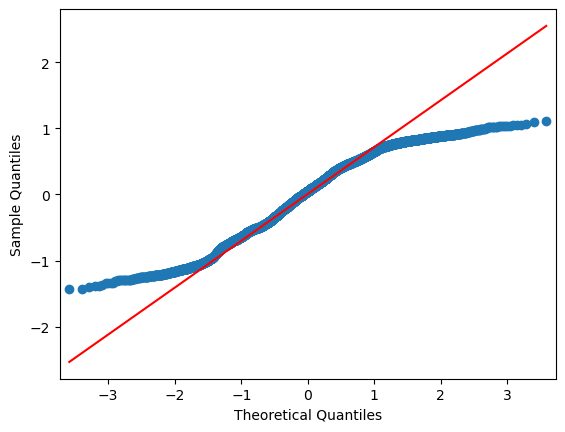

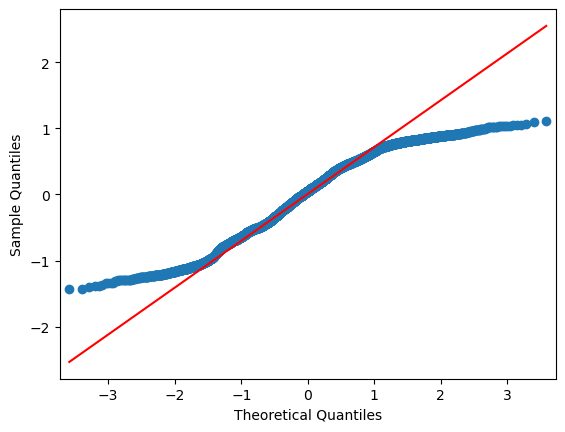

In [79]:
sm.qqplot(results_3.resid, line='q')

<div style="text-align: justify">Gráficamente, se puede observar que existen algunas observaciones que se ubican fuera de la línea. De este modo, es necesario desarrollar una prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos. Para ello, se establecen las siguientes hipótesis:</div>

$H_0:$ Los residuos se distribuyen normalmente

$H_1:$ Los residuos no se distribuyen normalmente

In [81]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [82]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_3.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 282.0930967998),
 ('Chi^2 two-tail prob.', 5.5496083945637024e-62),
 ('Skew', -0.2919266512495197),
 ('Kurtosis', 2.1040446529749057)]

<p><div style="text-align: justify">De este modo, $p-valor = 5.54 > \alpha = 0,05$. Por tanto, no se tiene suficiente evidencia para rechazar $H_0$. Así, con un nivel de confianza del $95\%$, se puede asumir normalidad en los residuos.</div>

<div style="text-align: justify">Además, la media de los residuos tiende a cero, así, no se estaría violando este supuesto:</div>

In [83]:
results_3.resid.mean()

-5.771659426666185e-15

#### 9.3. Homocedasticidad en los residuos

In [84]:
y_pred = results_3.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

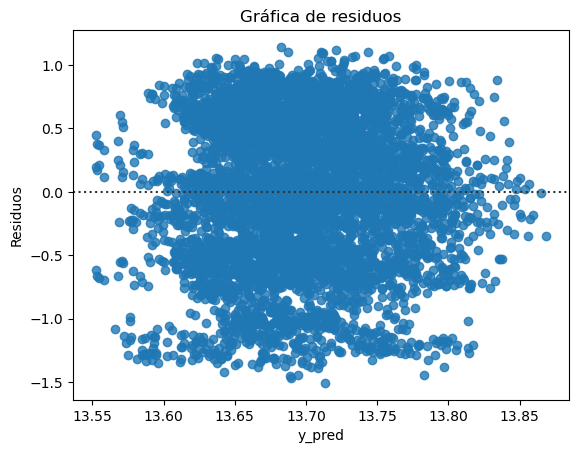

In [85]:
sns.residplot(y_pred, results.resid)
plt.xlabel("y_pred")
plt.ylabel("Residuos")
plt.title("Gráfica de residuos")

<div style="text-align: justify">Es necesario desarrollar una prueba de Breush Pagan para validar la hipótesis de heterocedasticidad en los residuos. Para ello, se establecen las siguientes hipótesis:</div>

$H_0:$ Existe homocedasticidad

$H_1:$ Existe heterocedasticidad

In [87]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_3.resid, results_3.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 249.19288835495746),
 ('p-value', 7.734848806737982e-55),
 ('f-value', 130.0056844966953),
 ('f p-value', 5.553852207317696e-56)]

<p><div style="text-align: justify">De este modo, $p-valor = 7.73 > \alpha = 0,05$. Por tanto, no se tiene suficiente evidencia para rechazar $H_0$. Así, con un nivel de confianza del $95\%$, se puede asumir homocedasticidad en los residuos.</div>

### 10. Modelo definitivo

<p><div style="text-align: justify">Se conserva el último modelo descrito.</div>

<div style="text-align: justify">$log\_Ventas\_semanales = 13.98 - 0.0025Temperatura - 0.017Tasa\_desempleo$</div>

### 11. Valores predichos y valores reales

In [89]:
yhat=results_3.fittedvalues

<function matplotlib.pyplot.show(close=None, block=None)>

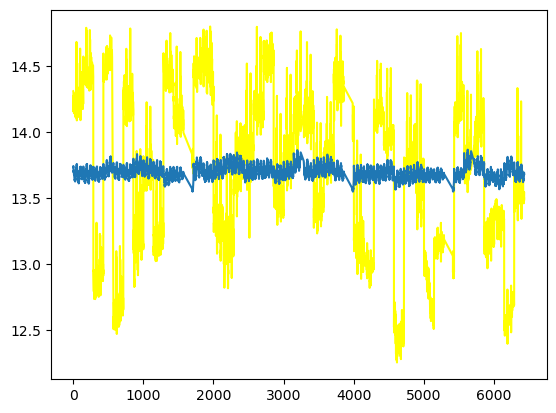

In [93]:
plt.plot(df.log_ventas, color='yellow', label="Valores Actuales")
plt.plot(yhat, label= "Valores predichos")
plt.show

<p><div style="text-align: justify">Como se puede observar en el gráfico, los valores predichos difieren significativamente de los valores reales. Aquello debido al bajo poder predictivo del modelo $R^2$.</div>

### 12. Interpretación y conclusiones

<p><div style="text-align: justify">Tasa de desempleo: Manteniendo el resto de factores constante, un incremento de una unidad en la tasa de desempleo, en promedio, reduce las ventas semanales en un 1.7% (0.0170*100).</div>
<p><div style="text-align: justify">Temperatura: Manteniendo el resto de factores constante, un incremento de una unidad en la temperatura, en promedio, reduce las ventas semanales en un 0.25% (0.0025*100).</div>

### ENFOQUE MACHINE LEARNING

<p><div style="text-align: justify">Se desarrolla el ejercicio precedente a través de un enfoque de machine learning. En este sentido, por ser de utilización común para las dos métodos, los ítems 1 - 7 han sido resueltos en la sección anterior.</div>

### 8. Modelización con enfoque de machine learning

#### 8.1. Separación de variables

In [94]:
# Separación de variables (predictoras y objetivo)

X = df[df.columns.difference(['Ventas_Semanales', 'log_ventas'])]
y = df.log_ventas

#### 8.2. Datos de entrenamiento

<div style="text-align: justify">Se separan los datos asumiendo un 90% de los datos para la submuestra de entrenamiento y un 10% para la submuestra de prueba.</div>

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.10, random_state = 123)

In [97]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5328, 6)  <class 'pandas.core.frame.DataFrame'>
(5328,) 	  <class 'pandas.core.series.Series'>
(592, 6)  <class 'pandas.core.frame.DataFrame'>
(592,) 	  <class 'pandas.core.series.Series'>


<div style="text-align: justify">Una vez que se tienen los diferentes conjuntos de datos, se entrena al modelo.</div>

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [101]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

### 10. Métricas de evaluación

#### 10.1. Error cuadrático medio (MSE)

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [103]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

0.02395074159239002
0.028412399916190566


In [104]:
MSE_train < MSE_test

True

<div style="text-align: justify">El error cuadrático medio (MSE) es menor para el subconjunto de entrenamiento que para el de prueba.</div>

#### 10.2. Raíz del error cuadrático medio (RMSE)

In [105]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

0.15476027136313125
0.16855978143136804


In [106]:
RMSE_train < RMSE_test

True

<div style="text-align: justify">La raíz del error cuadrático medio (RMSE) es menor para el subconjunto de entrenamiento que para el de prueba.</div>

#### 10.3. Error absoluto medio

In [107]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

0.12425601292234656
0.13651679499766392


In [108]:
MAE_train < MAE_test

True

<div style="text-align: justify">El error absoluto medio (MAE) es menor para el subconjunto de entrenamiento que para el de prueba.</div>

#### 10.4. $R^2$

In [109]:
from sklearn.metrics import r2_score

In [110]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.9296760515752519
El R^2 del subconjunto de prueba es: 0.9227963407510017


<div style="text-align: justify">Una vez que se han obtenido y evaluado el MSE, RMSE, MAE y $R^2$, es posible afirmar que la construcción del modelo es aceptable.</div>

### 11. Predicciones

#### 11.1. Predicciones es el subgrupo de datos de entrenamiento

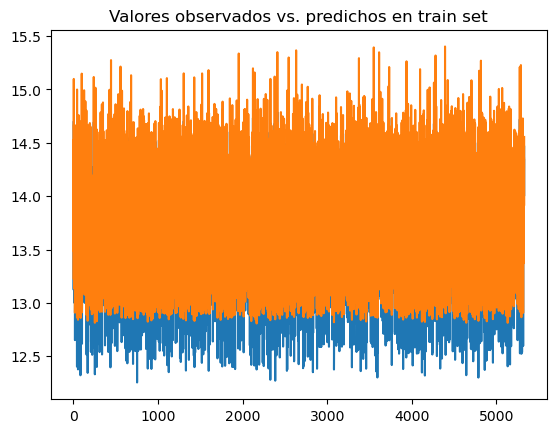

In [111]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

#### 11.2. Predicciones es el subgrupo de datos de prueba

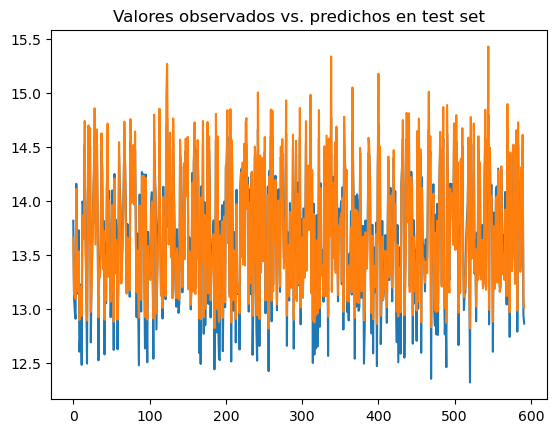

In [112]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

#### 11.3. Normalización de variables explicativas

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc = StandardScaler()

In [115]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### 11.4. Entrenamiento del modelo

In [116]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

#### 11.5. Predicciones

In [117]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

#### 11.6. $R^2$ del subconjunto de entrenamiento

In [118]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.9296760515752519
El R^2 del subconjunto de prueba es: 0.9227963407509636


#### 11.7. Predicciones en el subgrupo de datos de entrenamiento

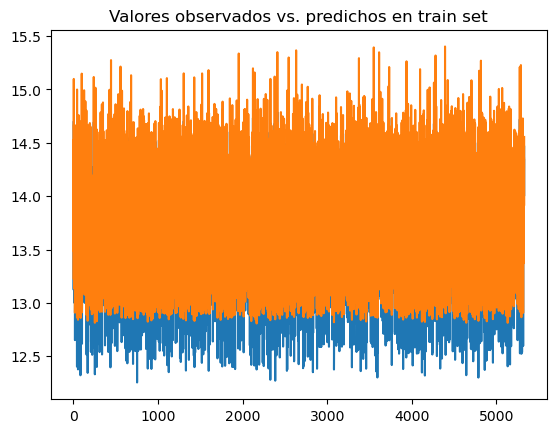

In [119]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

#### 11.8. Predicciones en el subgrupo de datos de prueba

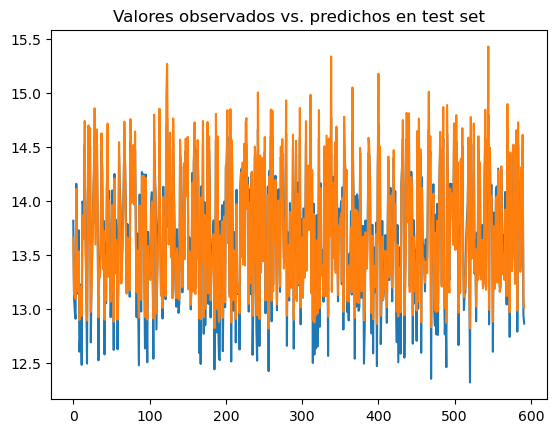

In [120]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

<p><div style="text-align: justify">Se puede observar en el gráfico que, en comparación al modelo construido con enfoque econométrico, las predicciones generadas con el modelo construido con enfoque de machine learning tienen un mayor ajuste con respecto a los datos reales.</div>

### 12. Poder explicativo de las variables

<div style="text-align: justify">Extraemos los coeficientes:</div>

In [122]:
importancia = modelo_regresion_std.coef_

In [123]:
# Resumen
for i, v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 0.01043
Variable explicativa No. 1, Score: 0.00868
Variable explicativa No. 2, Score: -0.00645
Variable explicativa No. 3, Score: 0.02354
Variable explicativa No. 4, Score: -0.03045
Variable explicativa No. 5, Score: 0.56310


<div style="text-align: justify">Para evaluar el poder explicativo de las variables, se evalúa el feature importance. De este modo, es posible evaluar el nivel de incidencia estadística de una variable independiente sobre la variable objetivo a prtir de la premisa que un feature importance negativo significa que esa característica hace que aumente la función de costos, por lo que el modelo no está hace un buen uso de esta variable.</div>

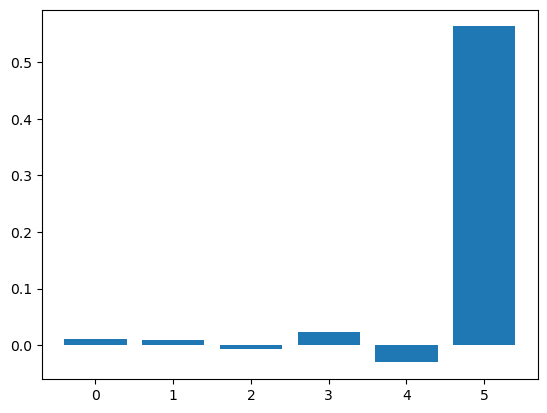

In [124]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

In [137]:
modelo_regresion_std.n_features_in_

6

<p><div style="text-align: justify">De este modo, es posible señalar que, en este caso en particular, el modelo construido con enfoque de machine learning brinda mayores ventajas, con respecto al modelo econométrico.</div>